# Visualization Analysis of Rain in Australia
(using Plotyly libraries)

Dataset Resource : [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

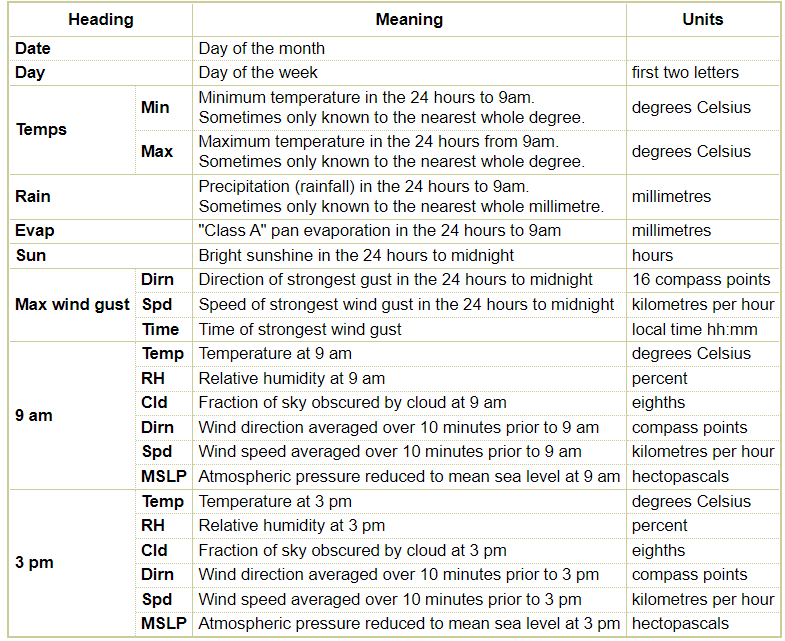


In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
# data = pd.read_csv('weatherAUS.csv')
df = data.copy()
df.head()

In [ ]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

### MissingNo visualizations

In [ ]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

null_values(df)

In [ ]:
import missingno as msno
msno.matrix(df);

In [ ]:
msno.bar(df);

In [ ]:
df = df.dropna(subset=['RainTomorrow', 'RainToday'])

### Frequency of categorical variables with histogram

**Make Feature Engineering**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Year'] = df['Date'].dt.year.astype('int16')
df['Month'] = df['Date'].dt.month.astype('int16')
df['Year_Month']=df['Date'].array.strftime('%Y-%m') # strftime works with array
df['DiffTemp']=df['MaxTemp']-df['MinTemp']
df.head()

In [ ]:
j=0
def figure():
    global j
    j+=1
    return 'fig_'+str(j)

In [ ]:
cat_vars = [i for i in df.columns if df[i].dtype=='object']
# cat_vars

In [ ]:
for i in cat_vars[:-1]:
    fig=figure()
    fig= px.histogram(df, x=i,title=f"fig_{j}: Frequency of {i}")
    fig.update_xaxes(categoryorder='total descending')
    fig.show()

### Distribution of numerical variables with histogram and boxplot/violin

- Additionally RainToday and RainTomorrow variables as color dimension

In [ ]:
num_vars = [i for i in df.columns if df[i].dtype!='object']
# num_vars

In [ ]:
cols=[
 'DiffTemp',
 'MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
]

In [ ]:
fig_=figure()
fig= px.histogram(df, x='Year_Month', color='RainToday',
                  title=f"fig_{j}: Rainy Day Distribution in Year-Month Time Series")
fig.show()

In [ ]:
for i in cols:
    fig=figure()
    fig= px.violin(df, x=i, color='RainToday',title=f"fig_{j}: Violinplot of {i}")
    fig.show()

    fig=figure()
    fig= px.histogram(df, x=i, color='RainToday',title=f"fig_{j}: Frequency Distribution of {i}")
    fig.show()

### Heatmap for correlation

In [ ]:
msno.heatmap(df);

### Scatter matrix and/or OLS Scatter Plot for numerical variables

- Additionally RainToday and RainTomorrow variables as color dimension

In [ ]:
cols=[
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'DiffTemp',
 'Year',
 'Month']

In [ ]:
df_0 = df.drop(['Date'],axis=1).groupby(['Year_Month','RainToday'])[cols].mean().reset_index()
# df_0

In [ ]:
 cols1 =[
         ('MinTemp', 'MaxTemp'),
         ('DiffTemp', 'Evaporation'),
         ('DiffTemp', 'Sunshine'),
         ('DiffTemp', 'Humidity9am'),
         ('DiffTemp', 'Pressure9am'),
         ('MaxTemp', 'Rainfall'),
         ('Rainfall', 'Evaporation'),
         ('Rainfall', 'Sunshine'),
         ('Rainfall', 'WindSpeed9am'),
         ('Rainfall', 'Humidity9am'),
         ('Rainfall', 'Pressure9am')]

In [ ]:
for pair in cols1:
    fig=figure()
    fig = px.scatter(df_0, x=pair[0], y=pair[1],title=f"fig_{j}: Scatterplot of {pair}",
                     trendline="ols",
                     color='RainToday',
                     trendline_color_override="green")
    fig.show()

### Time series (preferably monthly) line chart for numerical variables

- RainToday and RainTomorrow variables as 3rd variable with color dimension

- Tip: Use groupby method to group by month/year and calculate mean values

In [ ]:
cols= ['MinTemp', 'MaxTemp', 'DiffTemp','Rainfall', 'Evaporation',
       'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [ ]:
df1 = df_0.groupby(['Year_Month','RainToday'])[cols].agg('mean').reset_index()
df2 = df_0.groupby(['Month','RainToday'])[cols].agg('mean').reset_index()
df3 = df_0.groupby(['Year','RainToday'])[cols].agg('mean').reset_index()

In [ ]:
for i in cols:
    fig=figure()
    fig = px.line(df1, x='Year_Month', y=i, title=f"fig_{j}: Lineplot of {i}",
                     color='RainToday',
                 )
    fig.show()

In [ ]:
for i in cols:
    fig=figure()
    fig = px.line(df2, x='Month', y=i, title=f"fig_{j}: Lineplot of {i}",
                     color='RainToday',
                 )
    fig.show()

In [ ]:
for i in cols:
    fig=figure()
    fig = px.line(df3, x='Year', y=i, title=f"fig_{j}: Lineplot of {i}",
                     color='RainToday',
                 )
    fig.show()

### Polar/Radar chart for numerical variables and Wind Direction as the 2nd variable

- Tip: Use groupby method and calculate mean values

In [ ]:
df4 = df[df.RainToday=='Yes'].groupby('WindGustDir')[cols].agg('mean').reset_index()
df5 = df[df.RainToday=='No'].groupby('WindGustDir')[cols].agg('mean').reset_index()


In [ ]:
import plotly.graph_objects as go

categories = df4.WindGustDir.unique()

for i in cols:
    fig=figure()
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=df4[i],
          theta=categories,
          fill='toself',
          name='Product A'
    ))
    fig.add_trace(go.Scatterpolar(
          r=df5[i],
          theta=categories,
          fill='toself',
          name='Product B'
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[min(df4[i].min(),df5[i].min()),
                 max(df4[i].max(),df5[i].max())]
        )),
      title={
        'text': f"fig_{j}: Radarplot of {i}",
        'y':0.9,'x':0.5,
        'xanchor': 'center','yanchor': 'top'},
      showlegend=False
    )

    fig.show()